# Data Analysis Module (Tradingview) 

## Example for BTC-USD

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

## Data import

In [3]:
df=pd.read_csv("Supertrend_Strategy_List_of_Trades_2024-01-06_30a09.csv")

In [4]:
df

,Trade #,Type,Signal,Date/Time,Price USD,Contracts,Profit USD,Profit %,Cum. Profit USD,Cum. Profit %,Run-up USD,Run-up %,Drawdown USD,Drawdown %
0,284,Exit Short,Open,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,284,Entry Short,My Short Entry Id,2024-01-03 22:00,42556.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,283,Exit Long,My Short Entry Id,2024-01-03 22:00,42556.0,0.079653,-185.19,-5.18,13642.64,-0.78,83.24,2.33,332.95,9.31
3,283,Entry Long,My Long Entry Id,2024-01-02 10:00,44881.0,0.079653,-185.19,-5.18,13642.64,-0.78,83.24,2.33,332.95,9.31
4,282,Exit Short,My Long Entry Id,2024-01-02 10:00,44881.0,0.085044,-211.16,-5.86,13827.83,-0.88,75.43,2.09,255.56,7.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,3,Entry Long,My Long Entry Id,2017-03-11 01:00,1230.9,1.235157,-28.78,-1.89,106.92,-0.28,25.32,1.67,238.51,15.69
564,2,Exit Short,My Long Entry Id,2017-03-11 01:00,1230.9,1.265973,-33.17,-2.17,135.70,-0.33,109.38,7.17,78.24,5.13
565,2,Entry Short,My Short Entry Id,2017-03-07 17:00,1204.7,1.265973,-33.17,-2.17,135.70,-0.33,109.38,7.17,78.24,5.13
566,1,Exit Long,My Short Entry Id,2017-03-07 17:00,1204.7,1.385297,168.87,11.26,168.87,1.69,256.83,17.12,34.49,2.30


## Data processing

In [5]:
df_entry=df.iloc[1::2,:]
df_exit=df.iloc[::2,:]
df_entry.index=df_entry["Trade #"]
df_exit.index=df_exit["Trade #"]

In [6]:
df_entry.head()

,Trade #,Type,Signal,Date/Time,Price USD,Contracts,Profit USD,Profit %,Cum. Profit USD,Cum. Profit %,Run-up USD,Run-up %,Drawdown USD,Drawdown %
Trade #,,,,,,,,,,,,,,
284,284,Entry Short,My Short Entry Id,2024-01-03 22:00,42556.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,283,Entry Long,My Long Entry Id,2024-01-02 10:00,44881.0,0.079653,-185.19,-5.18,13642.64,-0.78,83.24,2.33,332.95,9.31
282,282,Entry Short,My Short Entry Id,2023-12-26 18:00,42398.0,0.085044,-211.16,-5.86,13827.83,-0.88,75.43,2.09,255.56,7.09
281,281,Entry Long,My Long Entry Id,2023-12-14 06:00,43050.0,0.084235,-54.92,-1.51,14039.00,-0.23,114.90,3.17,215.81,5.95
280,280,Entry Short,My Short Entry Id,2023-12-11 14:00,42035.0,0.086283,-87.58,-2.41,14093.92,-0.36,163.07,4.50,98.45,2.71


In [7]:
df_exit.head()

,Trade #,Type,Signal,Date/Time,Price USD,Contracts,Profit USD,Profit %,Cum. Profit USD,Cum. Profit %,Run-up USD,Run-up %,Drawdown USD,Drawdown %
Trade #,,,,,,,,,,,,,,
284,284,Exit Short,Open,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,283,Exit Long,My Short Entry Id,2024-01-03 22:00,42556.0,0.079653,-185.19,-5.18,13642.64,-0.78,83.24,2.33,332.95,9.31
282,282,Exit Short,My Long Entry Id,2024-01-02 10:00,44881.0,0.085044,-211.16,-5.86,13827.83,-0.88,75.43,2.09,255.56,7.09
281,281,Exit Long,My Short Entry Id,2023-12-26 18:00,42398.0,0.084235,-54.92,-1.51,14039.00,-0.23,114.90,3.17,215.81,5.95
280,280,Exit Short,My Long Entry Id,2023-12-14 06:00,43050.0,0.086283,-87.58,-2.41,14093.92,-0.36,163.07,4.50,98.45,2.71


In [8]:
df_entry=df_entry[["Type","Signal","Date/Time","Price USD","Profit USD","Contracts"]].copy()
df_exit=df_exit[["Type","Signal","Date/Time","Price USD","Contracts"]].copy()

In [9]:
df_entry.head()

,Type,Signal,Date/Time,Price USD,Profit USD,Contracts
Trade #,,,,,,
284,Entry Short,My Short Entry Id,2024-01-03 22:00,42556.0,NaN,NaN
283,Entry Long,My Long Entry Id,2024-01-02 10:00,44881.0,-185.19,0.079653
282,Entry Short,My Short Entry Id,2023-12-26 18:00,42398.0,-211.16,0.085044
281,Entry Long,My Long Entry Id,2023-12-14 06:00,43050.0,-54.92,0.084235
280,Entry Short,My Short Entry Id,2023-12-11 14:00,42035.0,-87.58,0.086283


In [10]:
df_exit.head()

,Type,Signal,Date/Time,Price USD,Contracts
Trade #,,,,,
284,Exit Short,Open,NaN,NaN,NaN
283,Exit Long,My Short Entry Id,2024-01-03 22:00,42556.0,0.079653
282,Exit Short,My Long Entry Id,2024-01-02 10:00,44881.0,0.085044
281,Exit Long,My Short Entry Id,2023-12-26 18:00,42398.0,0.084235
280,Exit Short,My Long Entry Id,2023-12-14 06:00,43050.0,0.086283


In [11]:
df_exit.columns=["Type_exit","Signal_exit","Date/Time_exit","Price_exit","Contracts_exit"]

In [12]:
df_exit.head()

,Type_exit,Signal_exit,Date/Time_exit,Price_exit,Contracts_exit
Trade #,,,,,
284,Exit Short,Open,NaN,NaN,NaN
283,Exit Long,My Short Entry Id,2024-01-03 22:00,42556.0,0.079653
282,Exit Short,My Long Entry Id,2024-01-02 10:00,44881.0,0.085044
281,Exit Long,My Short Entry Id,2023-12-26 18:00,42398.0,0.084235
280,Exit Short,My Long Entry Id,2023-12-14 06:00,43050.0,0.086283


In [13]:
df_trade=pd.concat([df_entry,df_exit],axis=1)

In [14]:
df_trade.dropna(axis=0,inplace=True)

In [15]:
df_trade

,Type,Signal,Date/Time,Price USD,Profit USD,Contracts,Type_exit,Signal_exit,Date/Time_exit,Price_exit,Contracts_exit
Trade #,,,,,,,,,,,
283,Entry Long,My Long Entry Id,2024-01-02 10:00,44881.0,-185.19,0.079653,Exit Long,My Short Entry Id,2024-01-03 22:00,42556.0,0.079653
282,Entry Short,My Short Entry Id,2023-12-26 18:00,42398.0,-211.16,0.085044,Exit Short,My Long Entry Id,2024-01-02 10:00,44881.0,0.085044
281,Entry Long,My Long Entry Id,2023-12-14 06:00,43050.0,-54.92,0.084235,Exit Long,My Short Entry Id,2023-12-26 18:00,42398.0,0.084235
280,Entry Short,My Short Entry Id,2023-12-11 14:00,42035.0,-87.58,0.086283,Exit Short,My Long Entry Id,2023-12-14 06:00,43050.0,0.086283
279,Entry Long,My Long Entry Id,2023-11-29 02:00,38249.0,353.80,0.093450,Exit Long,My Short Entry Id,2023-12-11 14:00,42035.0,0.093450
...,...,...,...,...,...,...,...,...,...,...,...
5,Entry Long,My Long Entry Id,2017-03-28 05:00,1046.5,182.44,1.479648,Exit Long,My Short Entry Id,2017-04-14 01:00,1169.8,1.479648
4,Entry Short,My Short Entry Id,2017-03-13 01:00,1207.6,216.10,1.341385,Exit Short,My Long Entry Id,2017-03-28 05:00,1046.5,1.341385
3,Entry Long,My Long Entry Id,2017-03-11 01:00,1230.9,-28.78,1.235157,Exit Long,My Short Entry Id,2017-03-13 01:00,1207.6,1.235157


## Win Rate & profit factor

In [16]:
win_rate=100*(df_trade["Profit USD"]>0).sum()/(len(df_trade["Profit USD"]))

In [17]:
win_rate

39.57597173144876

In [18]:
profit_sum=df_trade["Profit USD"][df_trade["Profit USD"]>=0].sum()
loss_sum=df_trade["Profit USD"][df_trade["Profit USD"]<0].sum()

In [19]:
profit_factor=profit_sum/(loss_sum*-1)

In [20]:
profit_factor

1.5813106946077218

## Statistics/Distribution of trade performance 

In [21]:
df_trade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283 entries, 283 to 1
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            283 non-null    object 
 1   Signal          283 non-null    object 
 2   Date/Time       283 non-null    object 
 3   Price USD       283 non-null    float64
 4   Profit USD      283 non-null    float64
 5   Contracts       283 non-null    float64
 6   Type_exit       283 non-null    object 
 7   Signal_exit     283 non-null    object 
 8   Date/Time_exit  283 non-null    object 
 9   Price_exit      283 non-null    float64
 10  Contracts_exit  283 non-null    float64
dtypes: float64(5), object(6)
memory usage: 26.5+ KB


In [22]:
df_trade["Date/Time"]=pd.to_datetime(df_trade["Date/Time"],format="%Y-%m-%d %H:%M")

In [23]:
df_trade["Year"]=df_trade['Date/Time'].dt.year 
df_trade["Month"]=df_trade['Date/Time'].dt.month
df_trade["Week"]=df_trade['Date/Time'].dt.isocalendar().week

In [24]:
df_trade

,Type,Signal,Date/Time,Price USD,Profit USD,Contracts,Type_exit,Signal_exit,Date/Time_exit,Price_exit,Contracts_exit,Year,Month,Week
Trade #,,,,,,,,,,,,,,
283,Entry Long,My Long Entry Id,2024-01-02 10:00:00,44881.0,-185.19,0.079653,Exit Long,My Short Entry Id,2024-01-03 22:00,42556.0,0.079653,2024,1,1
282,Entry Short,My Short Entry Id,2023-12-26 18:00:00,42398.0,-211.16,0.085044,Exit Short,My Long Entry Id,2024-01-02 10:00,44881.0,0.085044,2023,12,52
281,Entry Long,My Long Entry Id,2023-12-14 06:00:00,43050.0,-54.92,0.084235,Exit Long,My Short Entry Id,2023-12-26 18:00,42398.0,0.084235,2023,12,50
280,Entry Short,My Short Entry Id,2023-12-11 14:00:00,42035.0,-87.58,0.086283,Exit Short,My Long Entry Id,2023-12-14 06:00,43050.0,0.086283,2023,12,50
279,Entry Long,My Long Entry Id,2023-11-29 02:00:00,38249.0,353.80,0.093450,Exit Long,My Short Entry Id,2023-12-11 14:00,42035.0,0.093450,2023,11,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,Entry Long,My Long Entry Id,2017-03-28 05:00:00,1046.5,182.44,1.479648,Exit Long,My Short Entry Id,2017-04-14 01:00,1169.8,1.479648,2017,3,13
4,Entry Short,My Short Entry Id,2017-03-13 01:00:00,1207.6,216.10,1.341385,Exit Short,My Long Entry Id,2017-03-28 05:00,1046.5,1.341385,2017,3,11
3,Entry Long,My Long Entry Id,2017-03-11 01:00:00,1230.9,-28.78,1.235157,Exit Long,My Short Entry Id,2017-03-13 01:00,1207.6,1.235157,2017,3,10


In [25]:
df_trade_month=df_trade.groupby(["Year","Month"]).aggregate({"Type":"count"})

In [26]:
df_trade_month.columns=["Num_trade"]

In [27]:
df_trade_month

Num_trade
Year Month           
2017 2              1
     3              4
     4              2
     5              1
     6              4
...               ...
2023 9              6
     10             2
     11             4
     12             3
2024 1              1

[84 rows x 1 columns]

In [28]:
df_trade_month.reset_index(inplace=True)

In [29]:
df_trade_month

,Year,Month,Num_trade
0,2017,2,1
1,2017,3,4
2,2017,4,2
3,2017,5,1
4,2017,6,4
...,...,...,...
79,2023,9,6
80,2023,10,2
81,2023,11,4
82,2023,12,3


In [30]:
df_trade_month["Num_trade"].describe()

count    84.000000
mean      3.369048
std       1.395170
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       7.000000
Name: Num_trade, dtype: float64

In [31]:
df_trade_month.sort_values(["Num_trade"],ascending=False).head(20)

,Year,Month,Num_trade
64,2022,6,7
35,2020,1,6
79,2023,9,6
60,2022,2,6
7,2017,9,6
75,2023,5,6
69,2022,11,6
68,2022,10,5
66,2022,8,5
65,2022,7,5


In [32]:
df_trade_month[df_trade_month["Year"]==2022]

,Year,Month,Num_trade
59,2022,1,3
60,2022,2,6
61,2022,3,4
62,2022,4,5
63,2022,5,3
64,2022,6,7
65,2022,7,5
66,2022,8,5
67,2022,9,4
68,2022,10,5


In [33]:
df_trade_profit_year=df_trade.groupby(["Year"]).aggregate({"Profit USD":"sum"})

In [34]:
df_trade_profit_year

,Profit USD
Year,
2017,3770.56
2018,3042.38
2019,452.97
2020,1733.25
2021,3172.76
2022,-452.51
2023,2108.52
2024,-185.19


In [35]:
df_trade_profit_month=df_trade.groupby(["Year","Month"]).aggregate({"Profit USD":"sum"})

In [36]:
df_trade_profit_month.reset_index(inplace=True)

In [37]:
df_trade_profit_month.sort_values(["Profit USD"])

,Year,Month,Profit USD
29,2019,7,-509.48
39,2020,5,-498.55
52,2021,6,-493.61
42,2020,8,-484.90
7,2017,9,-443.85
...,...,...,...
80,2023,10,990.97
56,2021,10,1125.00
47,2021,1,1257.92
2,2017,4,1400.27


In [38]:
df_trade_profit_month[df_trade_profit_month["Year"]==2022]

,Year,Month,Profit USD
59,2022,1,145.67
60,2022,2,-219.39
61,2022,3,-201.81
62,2022,4,-15.42
63,2022,5,288.24
64,2022,6,-214.65
65,2022,7,-203.31
66,2022,8,-55.44
67,2022,9,-122.11
68,2022,10,-136.83


In [39]:
df_trade_month["Num_trade"].describe()

count    84.000000
mean      3.369048
std       1.395170
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       7.000000
Name: Num_trade, dtype: float64

In [40]:
df_trade_profit_month["Profit USD"].describe()

count      84.000000
mean      162.413571
std       453.455603
min      -509.480000
25%      -176.650000
50%        91.150000
75%       426.922500
max      1497.040000
Name: Profit USD, dtype: float64

In [41]:
df_trade_week=df_trade.groupby(["Year","Week"]).aggregate({"Type":"count"})

In [42]:
df_trade_week.columns=["Num_trade"]

In [43]:
df_trade_week.reset_index(inplace=True)

In [44]:
df_trade_week["Num_trade"].describe()

count    213.000000
mean       1.328638
std        0.545113
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: Num_trade, dtype: float64

In [45]:
df_trade_profit_week=df_trade.groupby(["Year","Week"]).aggregate({"Profit USD":"sum"})

In [46]:
df_trade_profit_week.describe()

,Profit USD
count,213.000000
mean,64.050423
std,363.189302
min,-632.250000
25%,-154.760000
50%,-19.610000
75%,168.870000
max,1599.010000


In [47]:
df_trade["Profit USD"][df_trade["Profit USD"]>0].describe()

count     112.000000
mean      331.354196
std       349.183485
min         2.870000
25%        68.725000
50%       206.435000
75%       470.305000
max      1599.010000
Name: Profit USD, dtype: float64

In [48]:
df_trade["Profit USD"][df_trade["Profit USD"]<0].describe()

count    171.000000
mean    -137.245205
std      100.525372
min     -632.250000
25%     -182.650000
50%     -133.030000
75%      -55.010000
max       -0.130000
Name: Profit USD, dtype: float64

## P&L chart 

In [49]:
df_trade.sort_index(inplace=True)

In [50]:
df_trade["P&L"]=df_trade["Profit USD"].cumsum()

In [51]:
df_trade["P&L_max"]=df_trade["P&L"].cummax()

In [52]:
df_trade["Drawdown"]=100*(df_trade["P&L"]-df_trade["P&L_max"])/df_trade["P&L_max"]

In [53]:
df_trade["Drawdown"].min()

-36.685023982945474

In [54]:
df_trade.tail()

,Type,Signal,Date/Time,Price USD,Profit USD,Contracts,Type_exit,Signal_exit,Date/Time_exit,Price_exit,Contracts_exit,Year,Month,Week,P&L,P&L_max,Drawdown
Trade #,,,,,,,,,,,,,,,,,
279,Entry Long,My Long Entry Id,2023-11-29 02:00:00,38249.0,353.80,0.093450,Exit Long,My Short Entry Id,2023-12-11 14:00,42035.0,0.093450,2023,11,48,14181.59,14356.6,-1.219021
280,Entry Short,My Short Entry Id,2023-12-11 14:00:00,42035.0,-87.58,0.086283,Exit Short,My Long Entry Id,2023-12-14 06:00,43050.0,0.086283,2023,12,50,14094.01,14356.6,-1.829054
281,Entry Long,My Long Entry Id,2023-12-14 06:00:00,43050.0,-54.92,0.084235,Exit Long,My Short Entry Id,2023-12-26 18:00,42398.0,0.084235,2023,12,50,14039.09,14356.6,-2.211596
282,Entry Short,My Short Entry Id,2023-12-26 18:00:00,42398.0,-211.16,0.085044,Exit Short,My Long Entry Id,2024-01-02 10:00,44881.0,0.085044,2023,12,52,13827.93,14356.6,-3.682418
283,Entry Long,My Long Entry Id,2024-01-02 10:00:00,44881.0,-185.19,0.079653,Exit Long,My Short Entry Id,2024-01-03 22:00,42556.0,0.079653,2024,1,1,13642.74,14356.6,-4.972347


In [55]:
df_hsi=yf.download("BTC-USD","2017-05-04","2022-08-09")

[*********************100%***********************]  1 of 1 completed


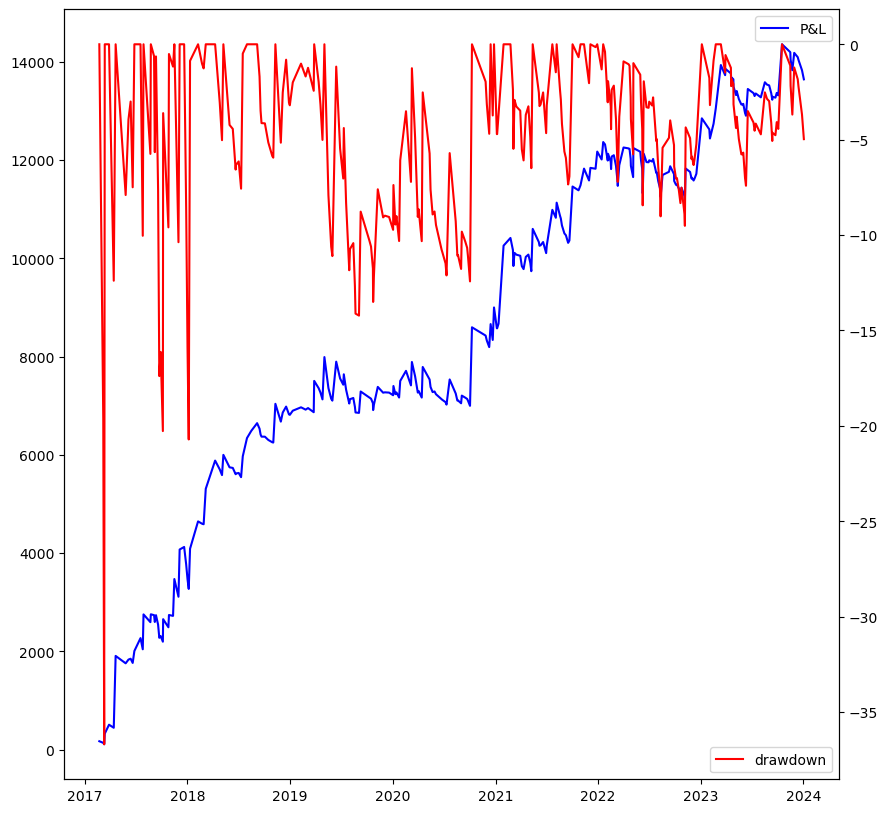

In [56]:
f1, ax = plt.subplots(figsize = (10,10))
ax.plot(df_trade["Date/Time"],df_trade["P&L"],color="blue",label="P&L")
ax1=ax.twinx()
ax1.plot(df_trade["Date/Time"],df_trade["Drawdown"],color="red",label="drawdown")
ax.legend()
ax1.legend(loc="lower right")
plt.show()

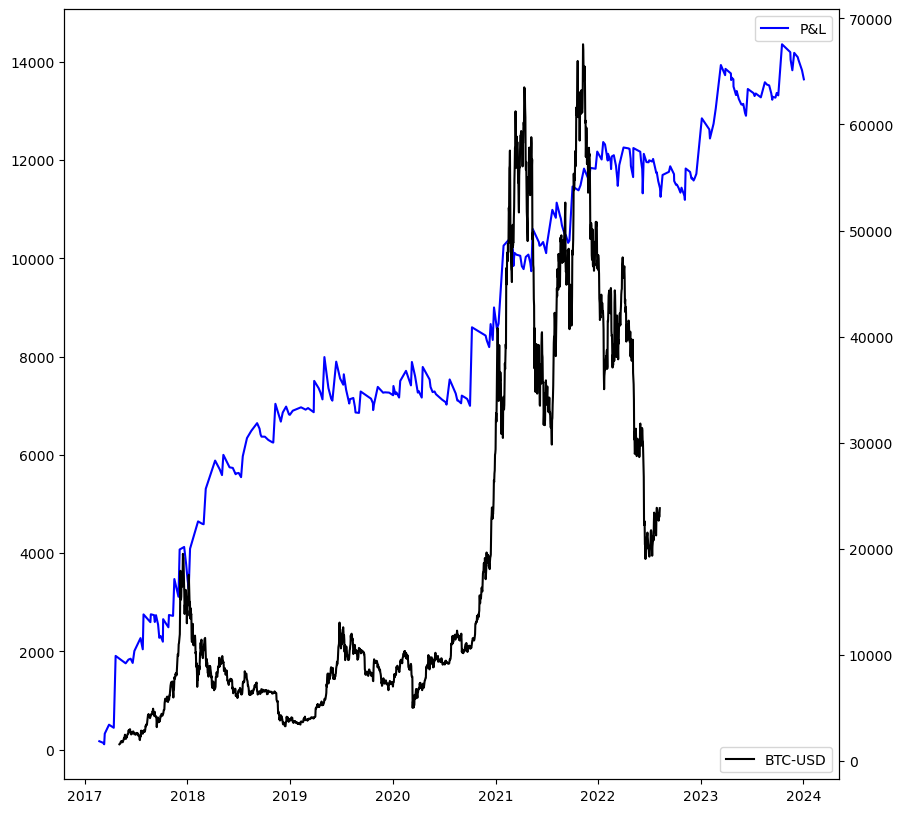

In [57]:
f1, ax = plt.subplots(figsize = (10,10))
ax.plot(df_trade["Date/Time"],df_trade["P&L"],color="blue",label="P&L")
ax1=ax.twinx()
ax1.plot(df_hsi.index,df_hsi["Close"],color="black",label="BTC-USD")
ax.legend()
ax1.legend(loc="lower right")
plt.show()